In [1]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime
from scipy import stats

# Забиарем данные

In [2]:
items_df = pd.read_csv('drive/MyDrive/project_data/items.csv')

In [3]:
items_df.sample(3)

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
15539,13219,film,Тропой войны,Path to War,2002.0,"драмы, биография, фильмы hbo",США,NaN,16.0,HBO,Джон Франкенхаймер,Джон Франкенхаймер,Биографическая драма. Одержав сокрушительную п...,"Тропой, войны, 2002, США"
12950,16450,series,"Учитель Ким, доктор Романтик",NaN,2019.0,"дорамы, медицинские, драмы, зарубежные, мелодрамы",Республика Корея,NaN,16.0,NaN,"Пак Су-джин, Ю Ин-щик","Ким Мин-джэ, Ким Хон-пха, Лим Вон-хи, Пён У-ми...","Кан Дон Джу стал врачом из-за того, что медици...","Учитель, Ким, доктор, Романтик, 2019, Южная, К..."
12688,15368,film,Сердце храбреца,Brave Heart,1951.0,"детские, русские, мультфильмы",СССР,NaN,0.0,NaN,"Геннадий Филиппов, Борис Дежкин","Николай Горлов, Нина Зорская, Леонид Пирогов, ...","Давным-давно жили-были два брата, Индига и Сол...","Сердце, храбреца, 1951, СССР"


In [4]:
users_df = pd.read_csv('drive/MyDrive/project_data/users.csv')

In [5]:
users_df.sample(3)

,user_id,age,income,sex,kids_flg
254275,761713,age_35_44,income_40_60,Ж,0
73328,378042,age_45_54,income_40_60,М,0
448613,561724,age_35_44,income_40_60,Ж,1


In [6]:
interactions_df = pd.read_csv('drive/MyDrive/project_data/interactions.csv')

In [7]:
interactions_df.sample(3)

,user_id,item_id,last_watch_dt,total_dur,watched_pct
1135206,536020,4689,2021-07-27,656,11.0
4031063,888979,15297,2021-06-09,332,0.0
2251613,531720,3567,2021-07-08,6973,100.0


In [8]:
subm_df = pd.read_csv('drive/MyDrive/project_data/sample_submission.csv')

In [9]:
subm_df.sample(3)

,user_id,item_id
58003,330491,"[9728, 15297, 10440, 14488, 13865, 12192, 341,..."
139133,790018,"[9728, 15297, 10440, 14488, 13865, 12192, 341,..."
160750,913422,"[9728, 15297, 10440, 14488, 13865, 12192, 341,..."


## Посмотрим на users, что имеем

<Axes: xlabel='age', ylabel='Count'>

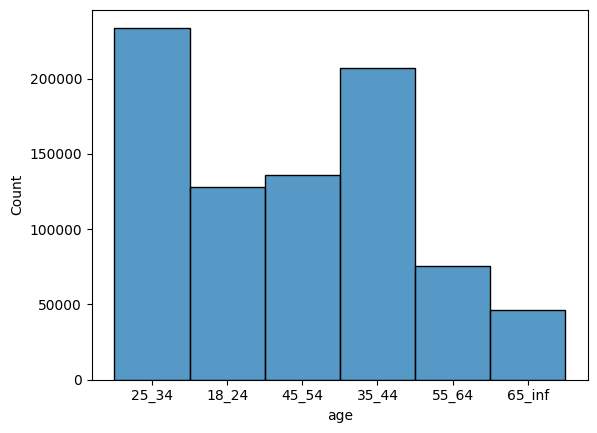

In [23]:
sb.histplot(users_df['age'][users_df['age'].isna() == False].apply(lambda x: str(x)[4:]))
# sb.histplot(x=['age_18_24', 'age_25_34', 'age_45_54', 'age_35_44', 'age_55_64', 'age_65_inf'], y=[127672, 233926, 207043, 135925, 75265, 46271])
# ['age_25_34', 'age_18_24', 'age_45_54', 'age_35_44', 'age_55_64', 'age_65_inf']

In [13]:
users_df['age'][users_df['age'].isna() == False].apply(lambda x: str(x)).value_counts()
# [127672, 233926, 207043, 135925, 75265, 46271]

age_25_34     233926
age_35_44     207043
age_45_54     135925
age_18_24     127672
age_55_64      75265
age_65_inf     46271
Name: age, dtype: int64

<Axes: xlabel='income', ylabel='Count'>

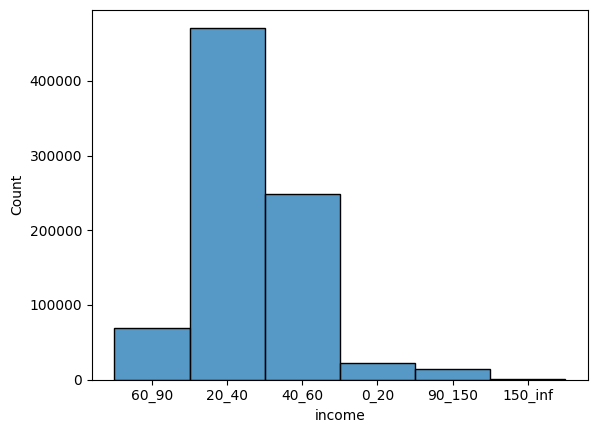

In [20]:
sb.histplot(users_df['income'][users_df['income'].isna() == False].apply(lambda x: str(x)[7:]))
# users_df['income'][users_df['income'].isna() == False].apply(lambda x: str(x)[7:]).value_counts().index

<Axes: xlabel='sex', ylabel='Count'>

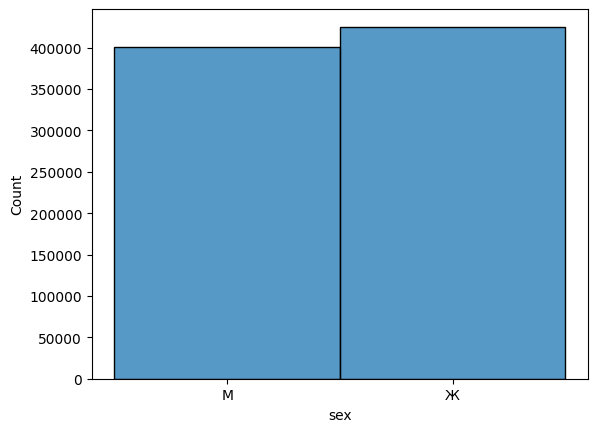

In [21]:
sb.histplot(users_df['sex'][users_df['sex'].isna() == False].apply(lambda x: str(x)))

<Axes: xlabel='kids_flg', ylabel='Count'>

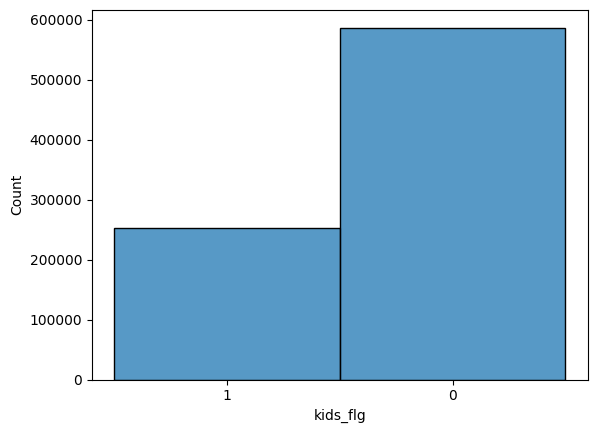

In [22]:
sb.histplot(users_df['kids_flg'][users_df['kids_flg'].isna() == False].apply(lambda x: str(x)))

## Посмотрим на items, что имеем

In [25]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15963 entries, 0 to 15962
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   item_id       15963 non-null  int64  
 1   content_type  15963 non-null  object 
 2   title         15963 non-null  object 
 3   title_orig    11218 non-null  object 
 4   release_year  15865 non-null  float64
 5   genres        15963 non-null  object 
 6   countries     15926 non-null  object 
 7   for_kids      566 non-null    float64
 8   age_rating    15961 non-null  float64
 9   studios       1065 non-null   object 
 10  directors     14454 non-null  object 
 11  actors        13344 non-null  object 
 12  description   15961 non-null  object 
 13  keywords      15540 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 1.7+ MB


In [27]:
items_num_features = ['release_year', 'for_kids', 'age_rating']

In [28]:
items_cat_features = ['content_type', 'title', 'title_orig', 'genres',
                      'countries', 'studios', 'directors', 'actors',
                      'description', 'keywords']

In [46]:
from pandas.core.arrays.integer import Int64Dtype
for feat in items_num_features:
    items_df[feat] = items_df[feat].astype(Int64Dtype())

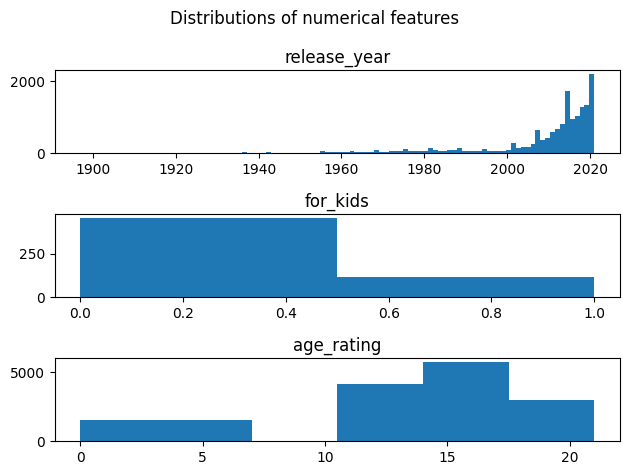

In [55]:
fig, axs = plt.subplots(3)
fig.suptitle('Distributions of numerical features')

for i in range(len(items_num_features)):
    axs[i].hist(items_df[items_df[items_num_features[i]].isna() == False][items_num_features[i]], bins=int(len(items_df[items_num_features[i]].drop_duplicates()) - 1))
    axs[i].set_title(items_num_features[i])
plt.tight_layout()

In [57]:
for feat in items_cat_features:
    print(feat)
    print(items_df[feat].value_counts())
    print()

content_type
film      12002
series     3961
Name: content_type, dtype: int64

title
Охота                                   5
Вторжение                               4
Родина                                  4
Красавица и чудовище                    4
Стрелок                                 4
                                       ..
Море соблазна                           1
Сексуальные эксперименты в космосе 2    1
Голый романтик                          1
Нежная рука закона                      1
Гоша                                    1
Name: title, Length: 15293, dtype: int64

title_orig
Little Women         4
Traditional dance    4
Pet Sematary         4
The Kid              3
Star Trek            3
                    ..
City by the Sea      1
La Gomera            1
Foxtrot Six          1
Vicious              1
Darklands            1
Name: title_orig, Length: 10575, dtype: int64

genres
документальное                                                             816
драмы         

In [59]:
items_df[items_df['genres'] == 'для взрослых'].sample(10)

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
12788,2422,film,Американские забавы,American Hustle,2014,для взрослых,США,<NA>,21,NaN,Вилл Райдер,NaN,"Что объединяет мастера покера, итальянских маф...","2014, соединенные штаты, американские, забавы"
13725,8610,film,Дом желаний 1,Dream honies 1,2011,для взрослых,Италия,<NA>,21,NaN,Денис Марти,NaN,Обворожительная пациентка проходит тщательное ...,"2011, италия, дом, желаний"
12995,2403,film,Сатиновая преданность,Satin Devotion,2013,для взрослых,"Нидерланды, Чехия",<NA>,21,NaN,Денис Марти,NaN,Эти великолепные любящие дамы демонстрируют ис...,"2013, нидерланды, чехия, сатиновая, преданность"
5304,9940,film,Милые девочки с большими формами,Sweet Girls With Massive Boobs,2016,для взрослых,США,<NA>,21,NaN,Бад Фокс,"Тайлер Никсон, Маркус Лондон, Томми Ганн","«Настоящий мужчина, чтобы начать взрослую жизн...","2016, соединенные штаты, милые, девочки, больш..."
7863,5512,film,Эвротико 3,Eurotico 03,2005,для взрослых,Италия,<NA>,21,NaN,"Денис Марти, Франческо Фанелли",NaN,Доступные красавицы приглашают мужчин поиграть...,"2005, италия, эвротико"
12260,3335,film,Соблазн,So Tempting,2017,для взрослых,Чехия,<NA>,21,NaN,Денис Франческо,NaN,Иногда соблазнение – не менее приятный процесс...,"2017, чехия, соблазн"
716,6751,film,Пошаговая инструкция,Step Relations,2016,для взрослых,Великобритания,<NA>,21,NaN,"Скарлетт Ревелл, Газзман",NaN,Существует ли специальная инструкция по соблаз...,"2016, соединенное королевство, пошаговая, инст..."
4601,8245,film,Затерянный в сексе,Virtualia Episode Six: Lost in Sex,2002,для взрослых,Швеция,<NA>,21,NaN,Антонио Адамо,"Линн Стоун, Сандра Руссо, Блэк Уидоу, Тиффани ...",Молодой детектив разыскивает таинственного ман...,", Анальный секс, Большая грудь, Бондаж, Взгляд..."
11492,11352,film,Тёмная сторона,Virtualia Episode Three: Dark Side,2001,для взрослых,Швеция,<NA>,21,NaN,Антонио Адамо,"Линн Стоун, Клаудия Риччи, Софи Эванс, Сандра ...",Приключенческая эротика в духе Индианы Джонса ...,", Анальный секс, Банкомат, Взгляд в камеру, Вт..."
15012,3741,film,Убийственный Трепет,Kill Thrill,2005,для взрослых,Швеция,<NA>,21,NaN,"Пьер Вудман, Антонио Адамо, Роман Новицки",NaN,"""На Карибских островах, где много-много диких ...","2005, швеция, убийственный, трепет"


## Посмотрим на interactions, что дано

In [60]:
interactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5476251 entries, 0 to 5476250
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        int64  
 1   item_id        int64  
 2   last_watch_dt  object 
 3   total_dur      int64  
 4   watched_pct    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 208.9+ MB


In [74]:
interactions_df['last_watch_dt'] = interactions_df['last_watch_dt'].apply(pd.to_datetime)

In [76]:
interactions_df['last_watch_dt'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5476251 entries, 0 to 5476250
Series name: last_watch_dt
Non-Null Count    Dtype         
--------------    -----         
5476251 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 41.8 MB


In [98]:
interactions_df['watch_days_ago'] = ((datetime.today() - interactions_df['last_watch_dt']) / np.timedelta64(1, 'D') - 811)

In [99]:
interactions_df['watch_days_ago'].sort_values()

2632367      0.69311
3106863      0.69311
3577569      0.69311
2194746      0.69311
4073834      0.69311
             ...    
460552     162.69311
3966323    162.69311
460543     162.69311
2793177    162.69311
1103209    162.69311
Name: watch_days_ago, Length: 5476251, dtype: float64

## Для взрослых

Посмотрим, много ли смотрят фильмы для взрослых и нужно ли их оставлять в нашем сервисе

In [100]:
adults = (
    interactions_df
    .join(
        items_df[items_df['genres'] == 'для взрослых']['item_id'],
        on=['item_id'],
        how='inner',
        rsuffix='items'
    )
    .drop('item_iditems', axis=1)
)

In [89]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190708 entries, 3 to 5399586
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         190708 non-null  int64         
 1   item_id         190708 non-null  int64         
 2   last_watch_dt   190708 non-null  datetime64[ns]
 3   total_dur       190708 non-null  int64         
 4   watched_pct     190702 non-null  float64       
 5   watch_days_ago  190708 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 10.2 MB


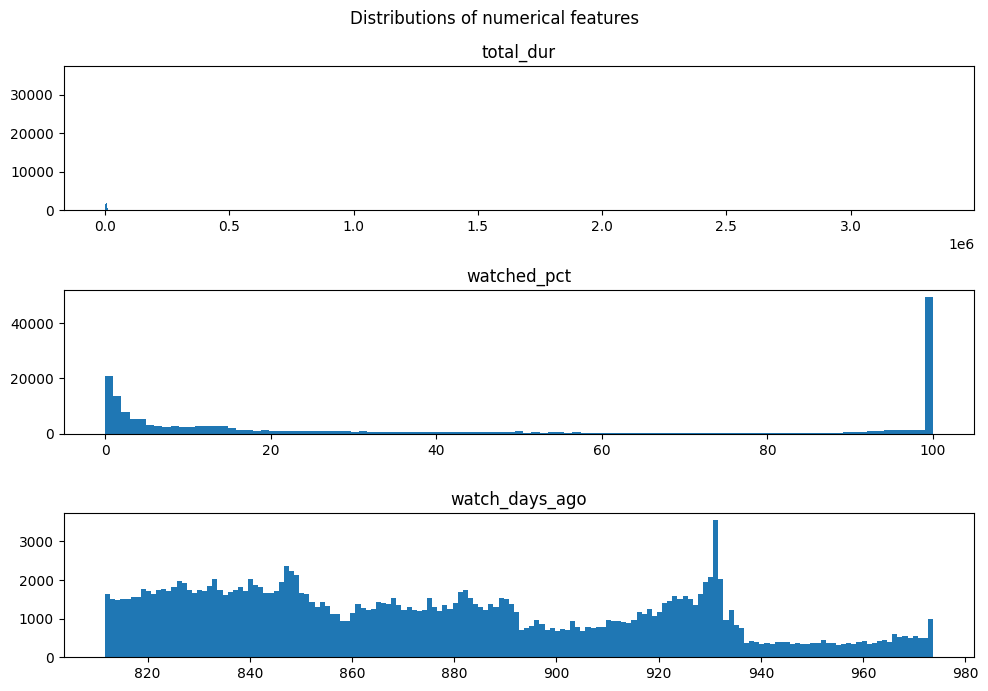

In [92]:
adults_num_feat = ['total_dur', 'watched_pct', 'watch_days_ago']

fig, axs = plt.subplots(3, figsize=(10, 7))
fig.suptitle('Distributions of numerical features')

for i in range(len(adults_num_feat)):
    axs[i].hist(
        adults[adults[adults_num_feat[i]].isna() == False][adults_num_feat[i]],
        bins=int(len(adults[adults_num_feat[i]].drop_duplicates()) - 1)
        )
    axs[i].set_title(adults_num_feat[i])
plt.tight_layout()

<Axes: xlabel='total_dur', ylabel='Count'>

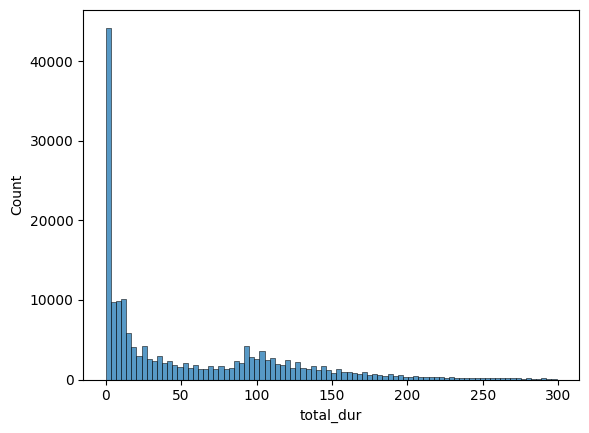

In [123]:
sb.histplot(adults[adults['total_dur'].isna() == False][(adults['total_dur'] // 60) < 300]['total_dur'].apply(lambda x: x // 60))

Вывод: из предоставленной выборки взаимодействий всего лишь 190 000 относятся к контенту для взрослых, удалив данный контент, мы не потеряем нужные данные для обучения. Но можем оставить и сделать наши рекомендации еще разнообразнее))

# Гипотезы

1. У разных возрастных групп разные предпочтения
2. У тех, кто имеет детей, предпочтения отличаются
3. У разных групп по доходу предпочтения отличаются

Ниже там будет что-то типа исследования гипотез

Так как таргет - процент просмотра от фильма, то сделаем его оценку, какая отсечка будет справедливой и сохранит нужные данные. То есть предположим, с какой точки будем считать, что фильм понравился

<Axes: xlabel='watched_pct', ylabel='Count'>

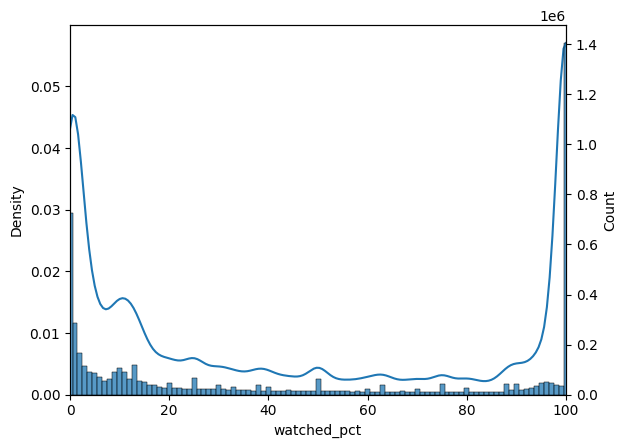

In [14]:
targ_data = interactions_df[interactions_df['watched_pct'].isna() == False][['watched_pct']]

fig, ax1 = plt.subplots()
sb.kdeplot(data=targ_data, x="watched_pct", ax=ax1)
ax1.set_xlim((targ_data["watched_pct"].min(), targ_data["watched_pct"].max()))
ax2 = ax1.twinx()
sb.histplot(data=targ_data, x="watched_pct", discrete=True, ax=ax2)

Вывод: возьмем за отсечку 80%

## Датасет для отбора интересов похожих пользователей

In [120]:
users_explor = (
    users_df[['user_id', 'age', 'income', 'sex', 'kids_flg']]
    .join(
        interactions_df[interactions_df['watched_pct'] >= 80]['item_id'],
        on=['user_id'],
        how='inner',
        rsuffix='inter'
    )
    .join(
        items_df[['release_year', 'for_kids', 'age_rating', 'genres', 'countries']],
        on=['item_id'],
        how='inner',
        rsuffix='item'
    )
)

In [121]:
users_explor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288850 entries, 0 to 839650
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       288850 non-null  int64  
 1   age           284010 non-null  object 
 2   income        283826 non-null  object 
 3   sex           284043 non-null  object 
 4   kids_flg      288850 non-null  int64  
 5   item_id       288850 non-null  int64  
 6   release_year  286790 non-null  float64
 7   for_kids      13022 non-null   float64
 8   age_rating    288850 non-null  float64
 9   genres        288850 non-null  object 
 10  countries     278225 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 26.4+ MB


In [122]:
users_explor['for_kids'].value_counts()

0.0    6921
1.0    6101
Name: for_kids, dtype: int64

In [123]:
users_explor['for_kids'] = users_explor['for_kids'].apply(lambda x: 0 if x != 1 else 1)

In [124]:
users_explor['for_kids'].value_counts()

0    282749
1      6101
Name: for_kids, dtype: int64

In [125]:
users_explor = users_explor.dropna()

In [126]:
users_explor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269757 entries, 0 to 839650
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       269757 non-null  int64  
 1   age           269757 non-null  object 
 2   income        269757 non-null  object 
 3   sex           269757 non-null  object 
 4   kids_flg      269757 non-null  int64  
 5   item_id       269757 non-null  int64  
 6   release_year  269757 non-null  float64
 7   for_kids      269757 non-null  int64  
 8   age_rating    269757 non-null  float64
 9   genres        269757 non-null  object 
 10  countries     269757 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 24.7+ MB


In [127]:
users_explor['age'] = users_explor['age'].apply(lambda x: (int(x[4:6]) + int(x[7:9])) / 2 if x != 'age_65_inf' else 65)

In [128]:
users_explor['age'].value_counts()

29.5    76359
39.5    68232
49.5    44721
21.0    41600
59.5    23692
65.0    15153
Name: age, dtype: int64

In [129]:
def inc(x):
    if x == 'income_0_20':
        return 10
    elif x == 'income_150_inf':
        return 200
    elif x == 'income_90_150':
        return 120
    else:
        return (int(x[7:9]) + int(x[10:12])) / 2

In [130]:
users_explor['income'] = users_explor['income'].apply(inc)

In [131]:
users_explor['income'].value_counts()

30.0     153940
50.0      80964
75.0      22652
10.0       7145
120.0      4684
200.0       372
Name: income, dtype: int64

In [132]:
def genre(x):
    lst = x.split(',')
    map(strip(), x.split(','))
    return lst

In [133]:
users_explor['genres'] = users_explor['genres'].apply(lambda x: list(map(str.strip, x.split(','))))

In [134]:
g_lst = users_explor['genres'].to_list()
g_dict = dict()

for film in g_lst:
    for g in film:
        if g in g_dict.keys():
            g_dict[g] += 1
        else:
            g_dict[g] = 1

In [135]:
g_dict = sorted(g_dict.items(), key=lambda item: item[1], reverse=True)

In [136]:
# каких жанров больше
g_dict

[('комедии', 82887),
 ('драмы', 72845),
 ('мелодрамы', 62002),
 ('зарубежные', 56692),
 ('русские', 41971),
 ('детективы', 36769),
 ('приключения', 29755),
 ('триллеры', 28726),
 ('семейное', 26993),
 ('фэнтези', 25979),
 ('боевики', 25676),
 ('фантастика', 25373),
 ('ужасы', 23620),
 ('документальное', 19825),
 ('криминал', 13130),
 ('советские', 11685),
 ('военные', 10815),
 ('для взрослых', 9581),
 ('для детей', 9544),
 ('мультфильмы', 7499),
 ('биография', 6193),
 ('развлекательные', 5532),
 ('мультфильм', 5459),
 ('исторические', 4623),
 ('фитнес', 4018),
 ('спорт', 3379),
 ('no_genre', 3377),
 ('мультсериалы', 3056),
 ('историческое', 2717),
 ('музыкальные', 2683),
 ('западные мультфильмы', 2667),
 ('русские мультфильмы', 2224),
 ('короткометражные', 2180),
 ('детские', 2170),
 ('полнометражные', 1971),
 ('развитие', 1851),
 ('сериалы', 1732),
 ('фильмы', 1713),
 ('сказки', 1496),
 ('фильмы hbo', 1371),
 ('мюзиклы', 1046),
 ('экранизации', 963),
 ('про животных', 814),
 ('познава

In [137]:
users_explor.sample(3)

,user_id,age,income,sex,kids_flg,item_id,release_year,for_kids,age_rating,genres,countries
518446,375291,39.5,30.0,М,0,173,2014.0,0,16.0,"[боевики, криминал, приключения, комедии]",Германия
95638,298156,29.5,30.0,Ж,0,6729,2009.0,0,12.0,"[боевики, для детей, комедии]",США
296192,874021,49.5,50.0,Ж,1,13185,2013.0,0,16.0,"[приключения, зарубежные, ужасы, артхаус, фэнт...",Испания


In [138]:
users_explor = users_explor.explode('genres')

In [139]:
users_explor.sample(5)

,user_id,age,income,sex,kids_flg,item_id,release_year,for_kids,age_rating,genres,countries
272260,543711,59.5,30.0,М,0,6541,1992.0,0,18.0,мелодрамы,США
79723,16169,21.0,30.0,Ж,0,3734,2012.0,0,16.0,зарубежные,США
430099,230110,49.5,30.0,Ж,1,1151,2017.0,0,16.0,комедии,Германия
770315,1024649,39.5,30.0,М,1,14431,2012.0,0,18.0,боевики,США
12559,613764,59.5,30.0,М,0,15388,2021.0,0,16.0,мелодрамы,Украина


## Попробуем собрать что-то типа когорт вручную и подоказывать гипотезы

### 1. Гипотеза про возраст

#### Молодежь (до 30 лет, нет детей, доход не важен)

In [140]:
young_no_kids = users_explor[(users_explor['age'] < 30) & (users_explor['kids_flg'] != 1)]

In [141]:
young_no_kids['genres'].value_counts()[:5]

комедии       27042
драмы         23871
мелодрамы     20203
зарубежные    18475
русские       13768
Name: genres, dtype: int64

In [179]:
young_no_kids.drop_duplicates(['item_id', 'user_id'])['countries'].value_counts()[:5]

США               29617
Россия            21007
СССР              10230
Франция            5566
Великобритания     3762
Name: countries, dtype: int64

In [180]:
young_no_kids.drop_duplicates(['item_id', 'user_id'])['age_rating'].value_counts()

16.0    33094
12.0    24213
18.0    13671
0.0      7137
6.0      6732
21.0     3180
Name: age_rating, dtype: int64

In [181]:
young_no_kids.drop_duplicates(['item_id', 'user_id'])['for_kids'].value_counts()

0    86134
1     1893
Name: for_kids, dtype: int64

Посмотрим: есть ли разница между М и Ж полом

In [145]:
print('М:', (len(young_no_kids[young_no_kids['sex'] == 'М'].drop_duplicates('user_id'))))
print('Ж:', (len(young_no_kids[young_no_kids['sex'] == 'Ж'].drop_duplicates('user_id'))))

М: 37427
Ж: 50600


Не очень равномерно классы распределены, но выводы какие-то делать можно

In [146]:
young_no_kids[young_no_kids['sex'] == 'М']['genres'].value_counts()[:5]

комедии       11512
драмы         10102
мелодрамы      8612
зарубежные     7969
русские        5811
Name: genres, dtype: int64

In [147]:
young_no_kids[young_no_kids['sex'] == 'Ж']['genres'].value_counts()[:5]

комедии       15530
драмы         13769
мелодрамы     11591
зарубежные    10506
русские        7957
Name: genres, dtype: int64

Топ жанров у М и Ж одинаковый в этой когорте, значит он особо не влияет

Вывод: Молодежь без детей предпочитает комедии, драмы, мелодрамы преимущественно Российского и Американского произволства. Тенденция видна.

#### Возраст средний (от 30 до 65 лет, доход не важен)

In [170]:
middles = users_explor[(users_explor['age'] > 30) & (users_explor['age'] < 50)]

In [172]:
middles['genres'].value_counts()[:5]

комедии       42046
драмы         36900
мелодрамы     31419
зарубежные    28729
русские       21253
Name: genres, dtype: int64

In [182]:
middles.drop_duplicates(['item_id', 'user_id'])['countries'].value_counts()[:5]

США               45942
Россия            32685
СССР              15906
Франция            8759
Великобритания     5804
Name: countries, dtype: int64

In [183]:
middles.drop_duplicates(['item_id', 'user_id'])['age_rating'].value_counts()

16.0    51261
12.0    37830
18.0    21019
0.0     11284
6.0     10484
21.0     4767
Name: age_rating, dtype: int64

Вывод: У средней возрастной группы комедии сильноо превалируют над остальными жанравми, в отличие от молодежи, у которых комедии и драмы близко друг к другу.

#### Возрастные (от 55 до 65 лет, доход не важен)

In [171]:
seniors = users_explor[(users_explor['age'] > 55)]

In [175]:
seniors['genres'].value_counts()[:5]

комедии       11996
драмы         10464
мелодрамы      8993
зарубежные     8151
русские        6008
Name: genres, dtype: int64

In [184]:
seniors.drop_duplicates(['item_id', 'user_id'])['countries'].value_counts()[:5]

США               13034
Россия             9299
СССР               4460
Франция            2507
Великобритания     1635
Name: countries, dtype: int64

In [185]:
seniors.drop_duplicates(['item_id', 'user_id'])['age_rating'].value_counts()

16.0    14483
12.0    10847
18.0     5880
0.0      3184
6.0      3051
21.0     1400
Name: age_rating, dtype: int64

Вывод: У возрастной группы комедии и драмы на одном уровне, что отличает их от средней группы, а также фильмы из США не так сильно опережают Российские + СССР

Вывод: различий в предпочтениях между когортами на основе возраста имеются.  
####*Гипотезу про возраст принимаем*

### Гипотеза про детей

####  Без детей (возраст не важен, доход не важен, пол не важен)

In [148]:
no_kids = users_explor[(users_explor['kids_flg'] != 1)]

In [149]:
no_kids['genres'].value_counts()[:5]

комедии       57266
драмы         50494
мелодрамы     42939
зарубежные    39134
русские       29286
Name: genres, dtype: int64

In [186]:
no_kids.drop_duplicates(['item_id', 'user_id'])['countries'].value_counts()[:5]

США               62556
Россия            44740
СССР              21705
Франция           11933
Великобритания     7935
Name: countries, dtype: int64

In [187]:
no_kids.drop_duplicates(['item_id', 'user_id'])['age_rating'].value_counts()

16.0    69990
12.0    51613
18.0    28693
0.0     15248
6.0     14401
21.0     6598
Name: age_rating, dtype: int64

In [188]:
no_kids.drop_duplicates(['item_id', 'user_id'])['for_kids'].value_counts()

0    182501
1      4042
Name: for_kids, dtype: int64

#### С детьми (возраст не важен, доход не важен, пол не важен)

In [153]:
with_kids = users_explor[(users_explor['kids_flg'] == 1)]

In [154]:
with_kids['genres'].value_counts()[:5]

комедии       25621
драмы         22351
мелодрамы     19063
зарубежные    17558
русские       12685
Name: genres, dtype: int64

In [189]:
with_kids.drop_duplicates(['item_id', 'user_id'])['countries'].value_counts()[:5]

США               28087
Россия            19729
СССР               9499
Франция            5331
Великобритания     3497
Name: countries, dtype: int64

In [190]:
with_kids.drop_duplicates(['item_id', 'user_id'])['age_rating'].value_counts()

16.0    31358
12.0    22798
18.0    12934
0.0      6803
6.0      6342
21.0     2979
Name: age_rating, dtype: int64

In [191]:
with_kids.drop_duplicates(['item_id', 'user_id'])['for_kids'].value_counts()

0    81306
1     1908
Name: for_kids, dtype: int64

Вывод: на наших данных, наличие детей не вносит видимого вклада в предпочтения пользователей. Предпочтения имеют схожую структуру, разница только в кол-ве из-за несбалансированности классов.  
####*Гипотезу про детей отвергаем*

### Гипотеза про доход

In [159]:
low_inc = users_explor[(users_explor['income'] <= 30)]
med_inc = users_explor[(users_explor['income'] >= 50) & (users_explor['income'] <= 75)]
high_inc = users_explor[(users_explor['income'] >= 120)]

print('low:', len(low_inc.drop_duplicates('user_id')))
print('med:', len(med_inc.drop_duplicates('user_id')))
print('high:', len(high_inc.drop_duplicates('user_id')))

low: 161085
med: 103616
high: 5056


Классы очень несбалансированы

In [160]:
low_inc['genres'].value_counts()[:5]

комедии       49367
драмы         43736
мелодрамы     36938
зарубежные    33934
русские       25000
Name: genres, dtype: int64

In [161]:
med_inc['genres'].value_counts()[:5]

комедии       31972
драмы         27795
мелодрамы     23899
зарубежные    21708
русские       16138
Name: genres, dtype: int64

In [162]:
high_inc['genres'].value_counts()[:5]

комедии       1548
драмы         1314
мелодрамы     1165
зарубежные    1050
русские        833
Name: genres, dtype: int64

По жанрам разницы особой нет

In [192]:
low_inc.drop_duplicates(['item_id', 'user_id'])['countries'].value_counts()[:5]

США               53961
Россия            38410
СССР              18706
Франция           10377
Великобритания     6827
Name: countries, dtype: int64

In [193]:
med_inc.drop_duplicates(['item_id', 'user_id'])['countries'].value_counts()[:5]

США               34982
Россия            24832
СССР              11882
Франция            6590
Великобритания     4389
Name: countries, dtype: int64

In [194]:
high_inc.drop_duplicates(['item_id', 'user_id'])['countries'].value_counts()[:5]

США               1700
Россия            1227
СССР               616
Франция            297
Великобритания     216
Name: countries, dtype: int64

По странам также не видно сильной зависимости

In [195]:
low_inc.drop_duplicates(['item_id', 'user_id'])['age_rating'].value_counts()

16.0    60397
12.0    44400
18.0    24858
0.0     13184
6.0     12449
21.0     5797
Name: age_rating, dtype: int64

In [196]:
med_inc.drop_duplicates(['item_id', 'user_id'])['age_rating'].value_counts()

16.0    38995
12.0    28682
18.0    15997
0.0      8441
6.0      7899
21.0     3602
Name: age_rating, dtype: int64

In [197]:
high_inc.drop_duplicates(['item_id', 'user_id'])['age_rating'].value_counts()

16.0    1956
12.0    1329
18.0     772
0.0      426
6.0      395
21.0     178
Name: age_rating, dtype: int64

По рейтингу также нет видимой разницы. Скорее всего популярные фильмы зачастую имеют рейтинг 16 и 12

Вывод: различий в предпочтениях между когортами на основе дохода не обнаружено.  
####*Гипотезу про доход отвергаем*